In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Dataset

data_set = pd.read_csv('Redwinequality.csv')

In [3]:
df = pd.DataFrame(data_set)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
print(df.shape)

(1599, 12)


In [5]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [6]:
df.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

In [7]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


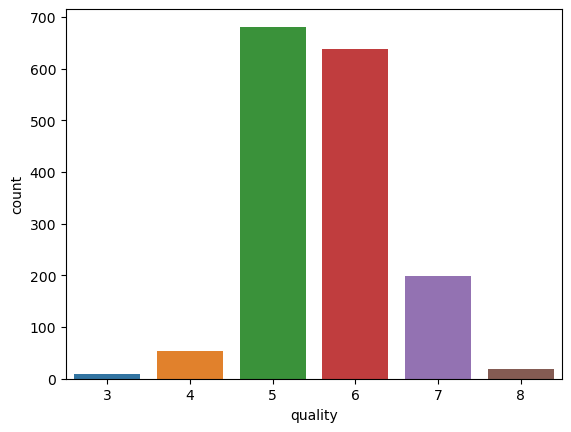

In [13]:
ax = sns.countplot(x = 'quality',data = df)
print(df['quality'].value_counts())

pH
3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: count, Length: 89, dtype: int64


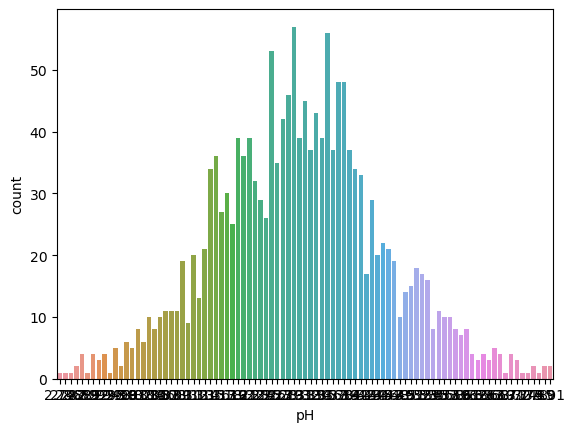

In [14]:
ax = sns.countplot(x = 'pH',data = df)
print(df['pH'].value_counts())

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64


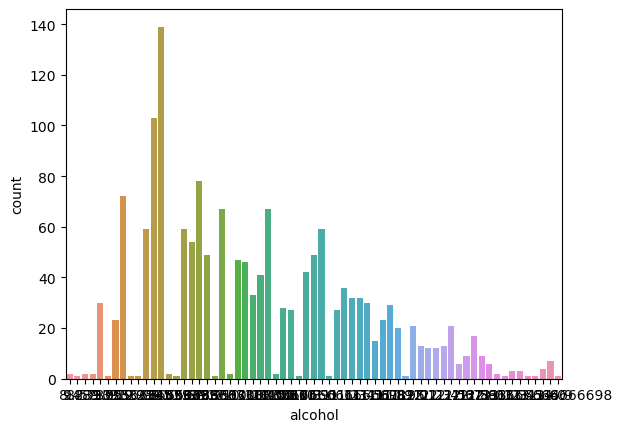

In [15]:
ax = sns.countplot(x = 'alcohol',data = df)
print(df['alcohol'].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


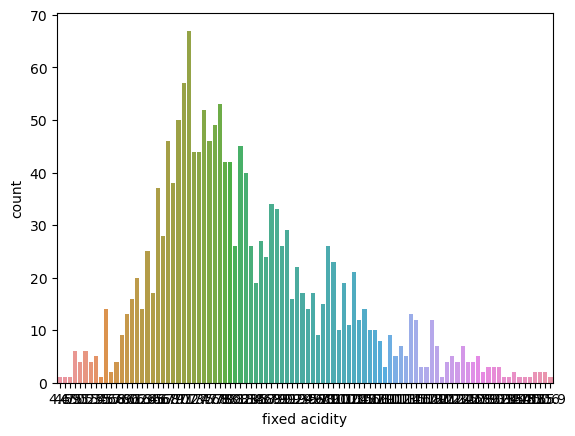

In [16]:
ax = sns.countplot(x = 'fixed acidity',data = df)
print(df['fixed acidity'].value_counts())

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


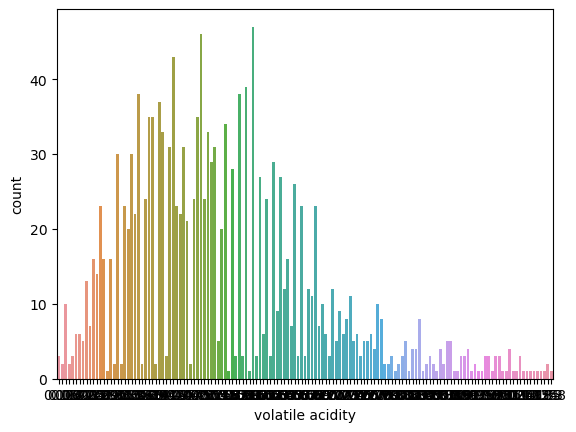

In [17]:
ax = sns.countplot(x = 'volatile acidity',data = df)
print(df['volatile acidity'].value_counts())

<Axes: >

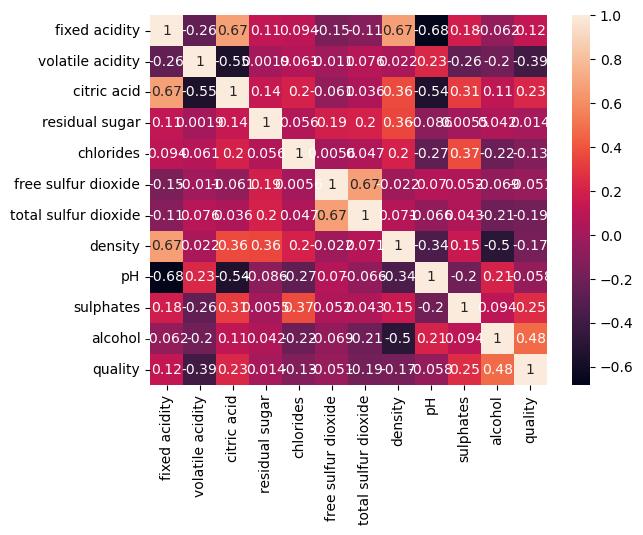

In [18]:
corr = df.corr()
sns.heatmap(corr,annot = True)

In [19]:
means = pd.pivot_table(data = df, index = 'quality', aggfunc = {'fixed acidity' : np.mean, 'volatile acidity' : np.mean, 'citric acid' : np.mean, 'residual sugar' : np.mean, 'chlorides' : np.mean, 'free sulfur dioxide' : np.mean, 'density' : np.mean, 'pH' : np.mean, 'sulphates' : np.mean, 'alcohol' : np.mean})
means

alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                               
3         9.955000   0.122500     0.171000  0.997464       8.360000   
4        10.265094   0.090679     0.174151  0.996542       7.779245   
5         9.899706   0.092736     0.243686  0.997104       8.167254   
6        10.629519   0.084956     0.273824  0.996615       8.347179   
7        11.465913   0.076588     0.375176  0.996104       8.872362   
8        12.094444   0.068444     0.391111  0.995212       8.566667   

         free sulfur dioxide        pH  residual sugar  sulphates  \
quality                                                             
3                  11.000000  3.398000        2.635000   0.570000   
4                  12.264151  3.381509        2.694340   0.596415   
5                  16.983847  3.304949        2.528855   0.620969   
6                  15.711599  3.318072        2.477194   0.675329   
7                  14.045226  3.290754        2.720603   0.741256   
8                  13.277778  3.267222        2.577778   0.767778   

         volatile acidity  
quality                    
3                0.884500  
4                0.693962  
5                0.577041  
6                0.497484  
7                0.403920  
8                0.423333

In [20]:
df['class'] = [1 if x >= 7 else 0 for x in df['quality']]

In [21]:
df['class'].value_counts()

class
0    1382
1     217
Name: count, dtype: int64

In [22]:
df1 = df.drop(columns = 'quality')

In [23]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  class  
0         9.4      0  
1         9.8      0  
2         9.8      0  
3         9.8      0  
4         9.4      0  
...       ...    ...  
1594     10.5      0  
1595     11.2      0  
1596     11.0      0  
1597     10.2      0  
1598     11.0      0  

[1599 rows x 12 columns]

In [24]:
means = pd.pivot_table(data = df, index = 'class', aggfunc = {'fixed acidity' :np.mean, 'volatile acidity' : np.mean, 'citric acid' : np.mean, 'residual sugar' :np.mean, 'chlorides' : np.mean, 'free sulfur dioxide': np.mean, 'density' : np.mean, 'pH' : np.mean, 'sulphates' : np.mean, 'alcohol' : np.mean})
means

alcohol  chlorides  citric acid   density  fixed acidity  \
class                                                               
0      10.251037   0.089281     0.254407  0.996859       8.236831   
1      11.518049   0.075912     0.376498  0.996030       8.847005   

       free sulfur dioxide        pH  residual sugar  sulphates  \
class                                                             
0                16.172214  3.314616        2.512120   0.644754   
1                13.981567  3.288802        2.708756   0.743456   

       volatile acidity  
class                    
0              0.547022  
1              0.405530

class
0    1382
1     217
Name: count, dtype: int64


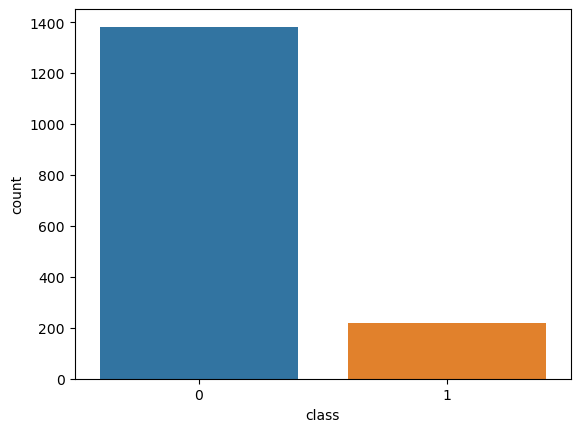

In [25]:
ax = sns.countplot(x = 'class',data = df)
print(df['class'].value_counts())

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

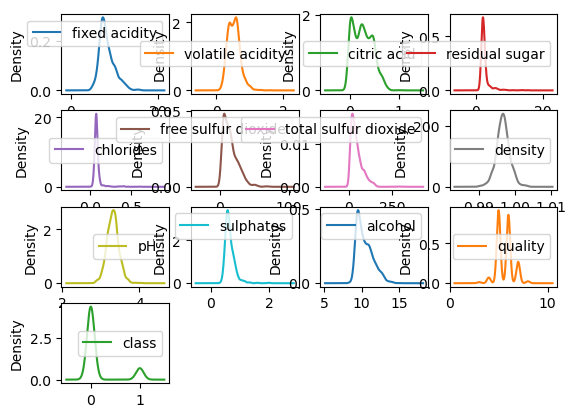

In [26]:
df.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False)

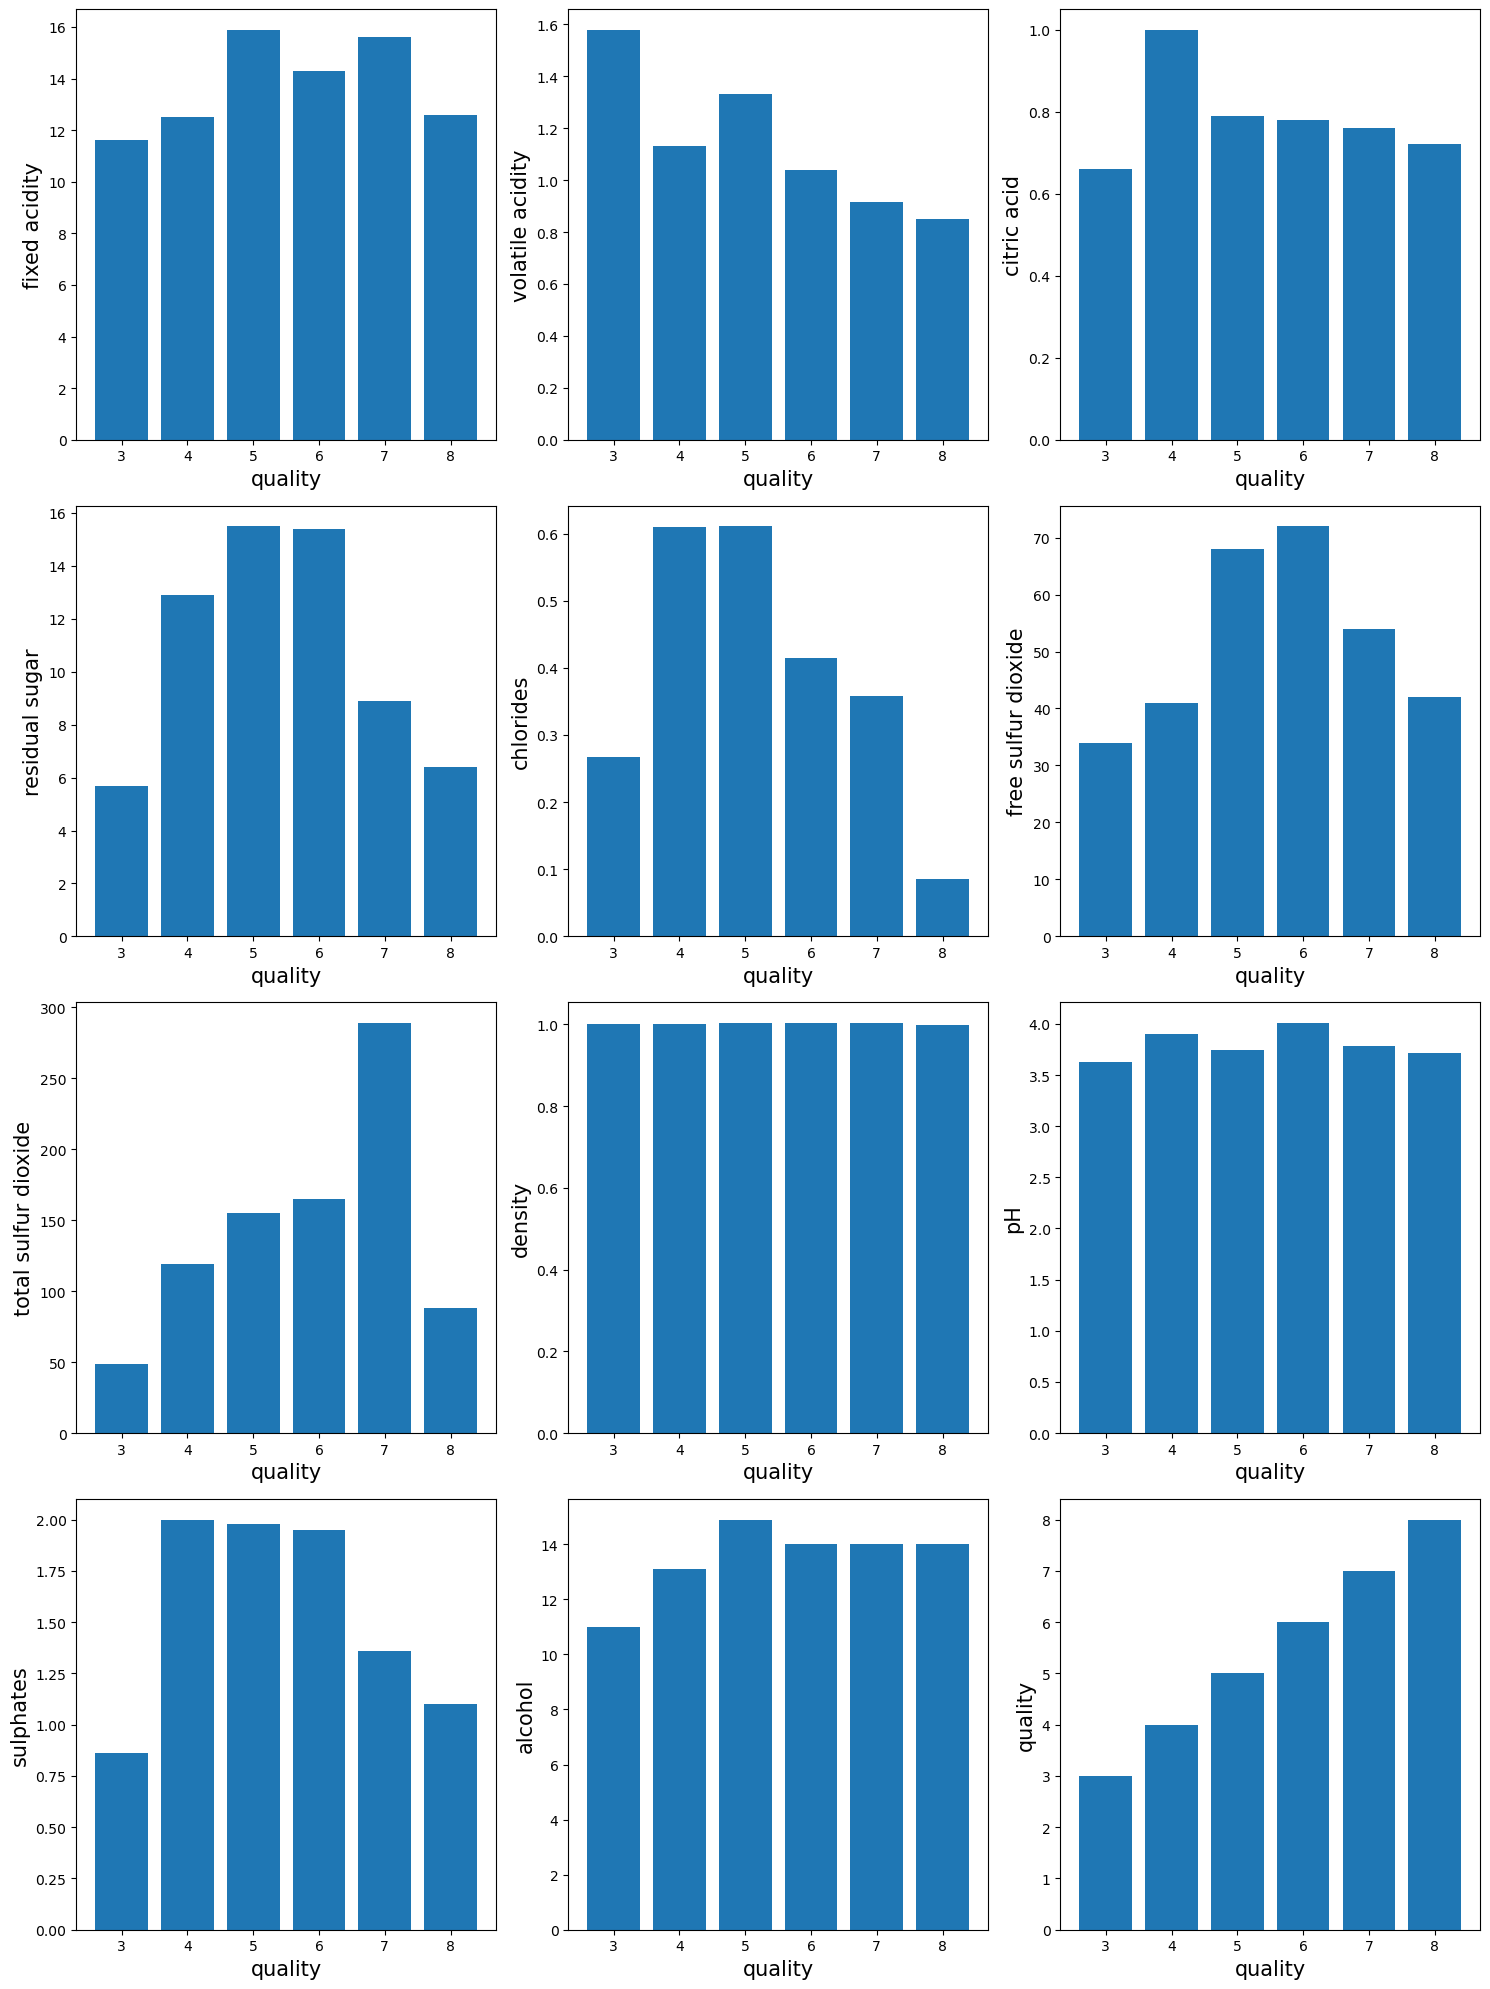

In [27]:
plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'], df[column])
        plt.xlabel('quality', fontsize = 15)
        plt.ylabel(column, fontsize = 15)
    plotnumber += 1
plt.tight_layout()
plt.show()

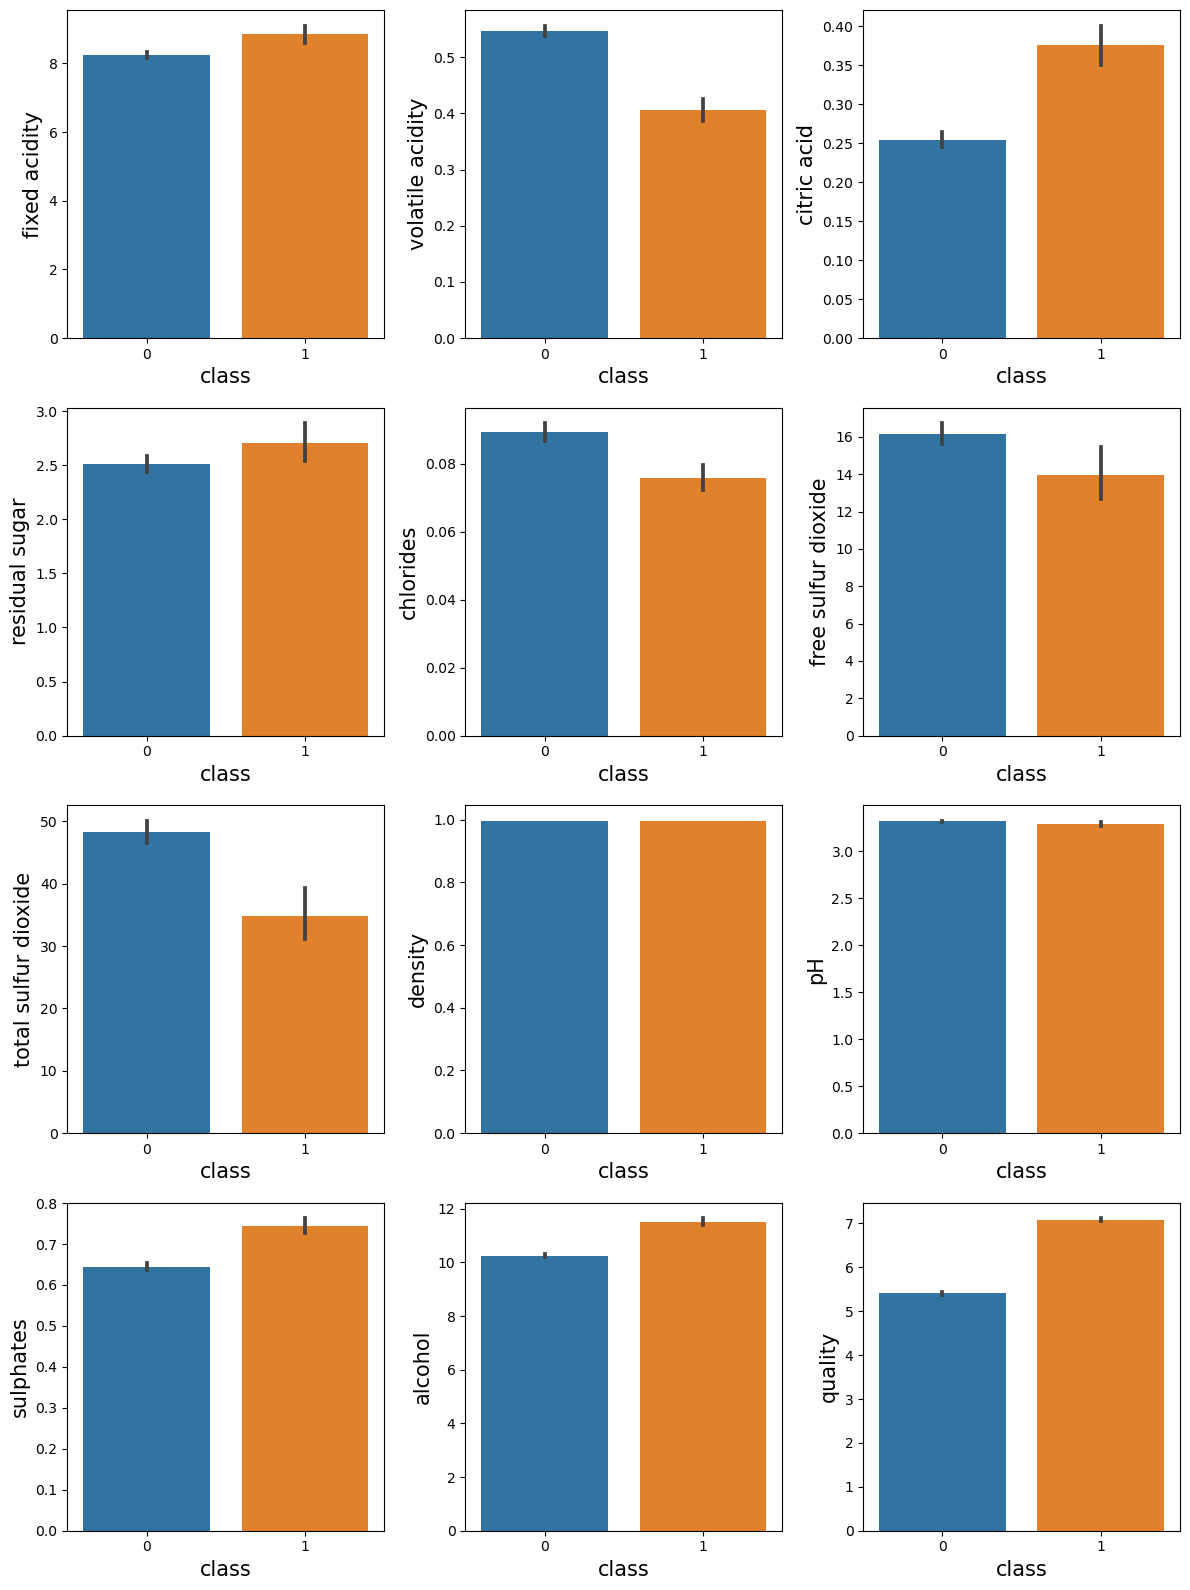

In [28]:
plt.figure(figsize = (12,16), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.barplot(x = 'class', y = column, data = df)
        plt.xlabel('class', fontsize = 15)
        plt.ylabel(column, fontsize = 15)
    plotnumber += 1
plt.tight_layout()
plt.show()
# class 1 = good quality
# class 0 = low quality

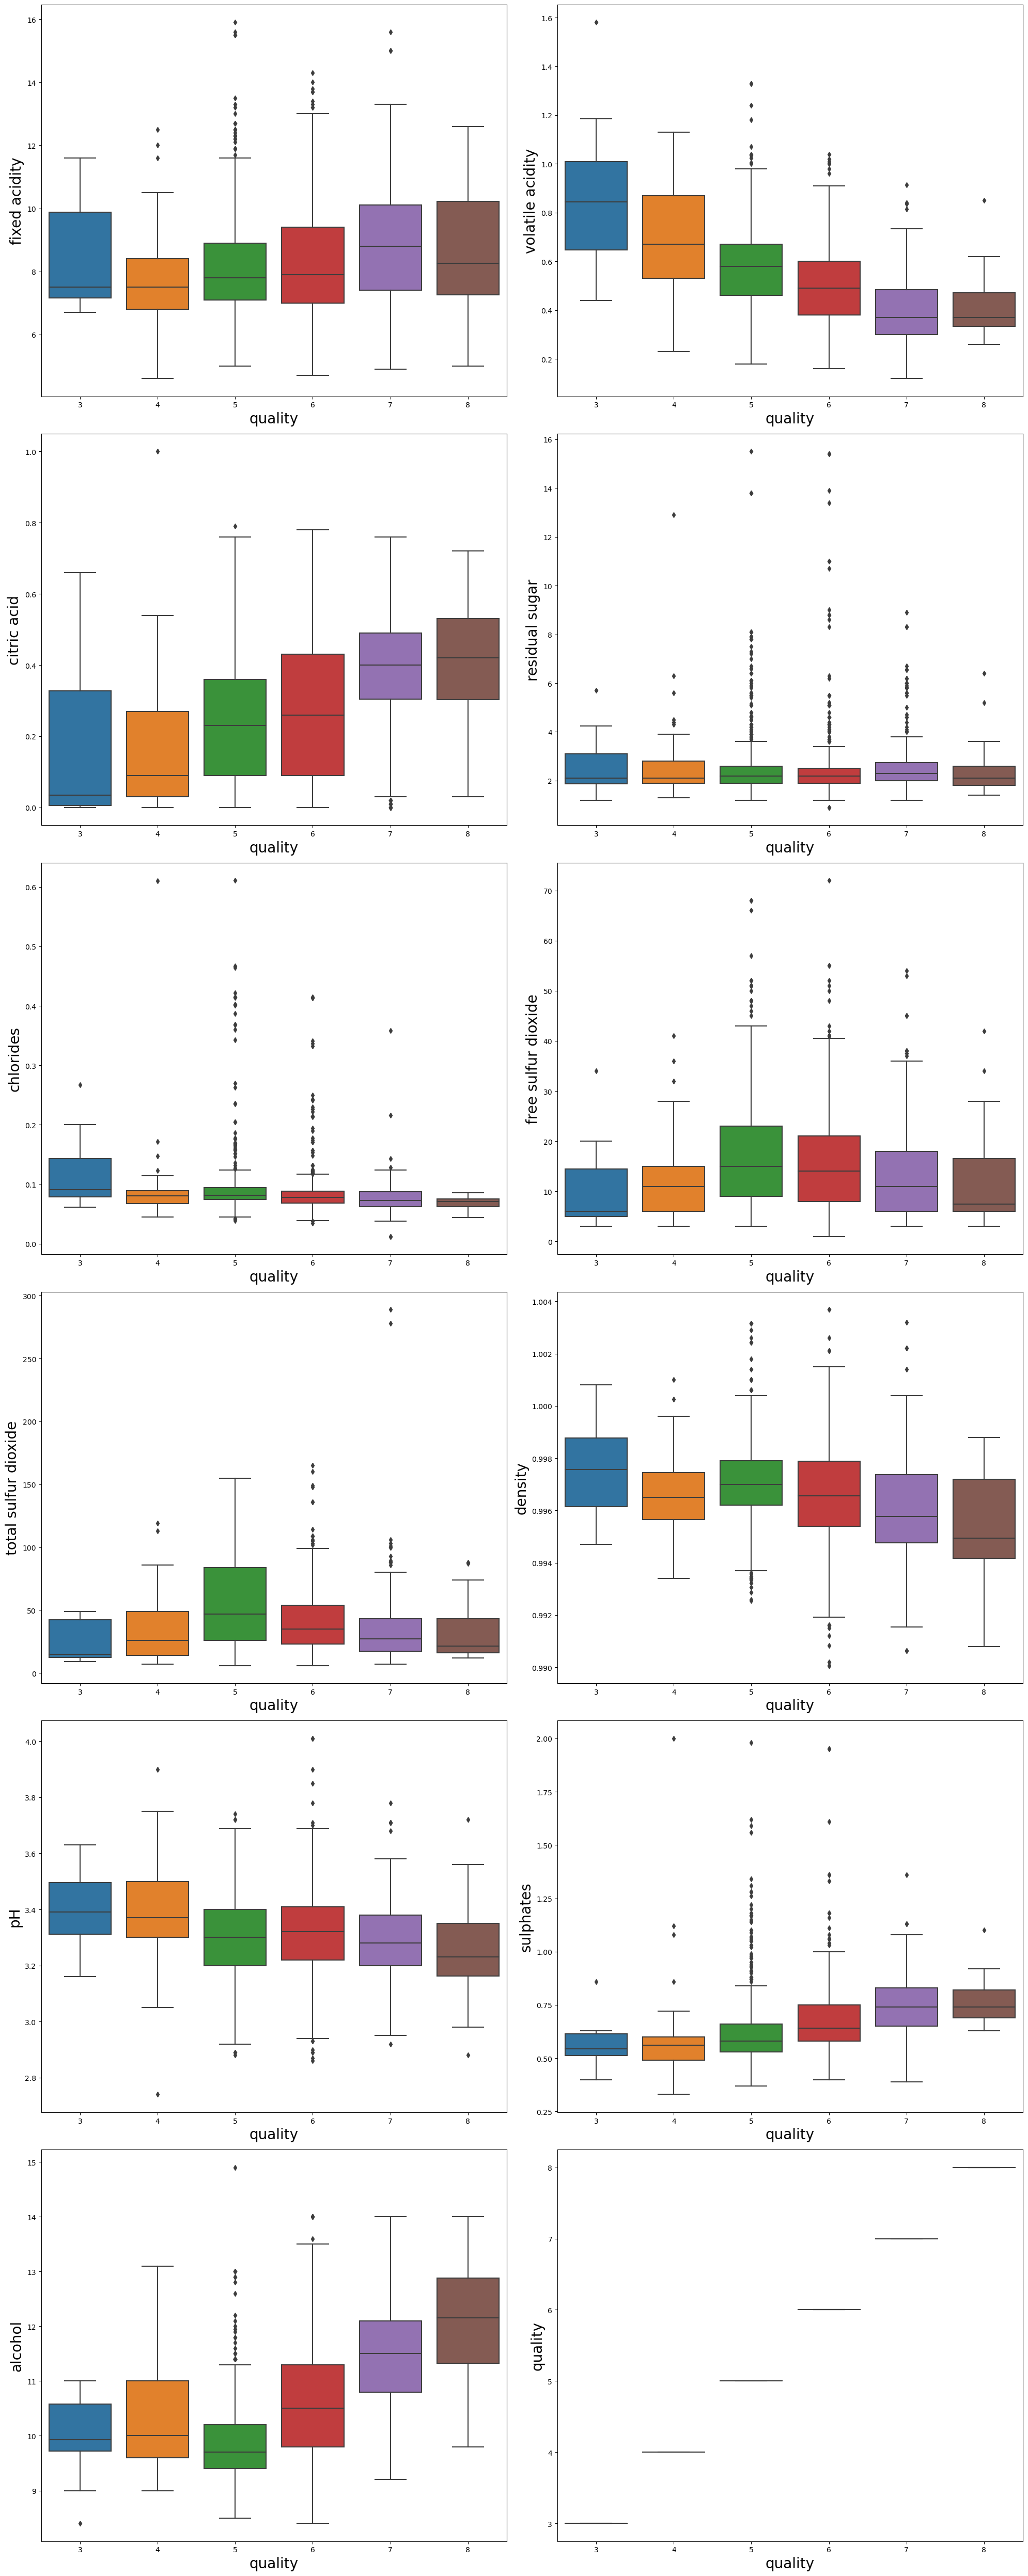

In [29]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(x = 'quality', y = column, data = df)
        plt.xlabel('quality', fontsize = 20)
        plt.ylabel(column, fontsize = 20)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [30]:
Grp_c = df.groupby('class')
C_1 = Grp_c.get_group(1)
C_2 = Grp_c.get_group(0)

In [31]:
C_1
C_2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  class  
0         9.4        5      0  
1         9.8        5      0  
2         9.8        5      0  
3         9.8        6      0  
4         9.4        5      0  
...       ...      ...    ...  
1594     10.5        5      0  
1595     11.2        6      0  
1596     11.0        6      0  
1597     10.2        5      0  
1598     11.0        6      0  

[1382 rows x 13 columns]

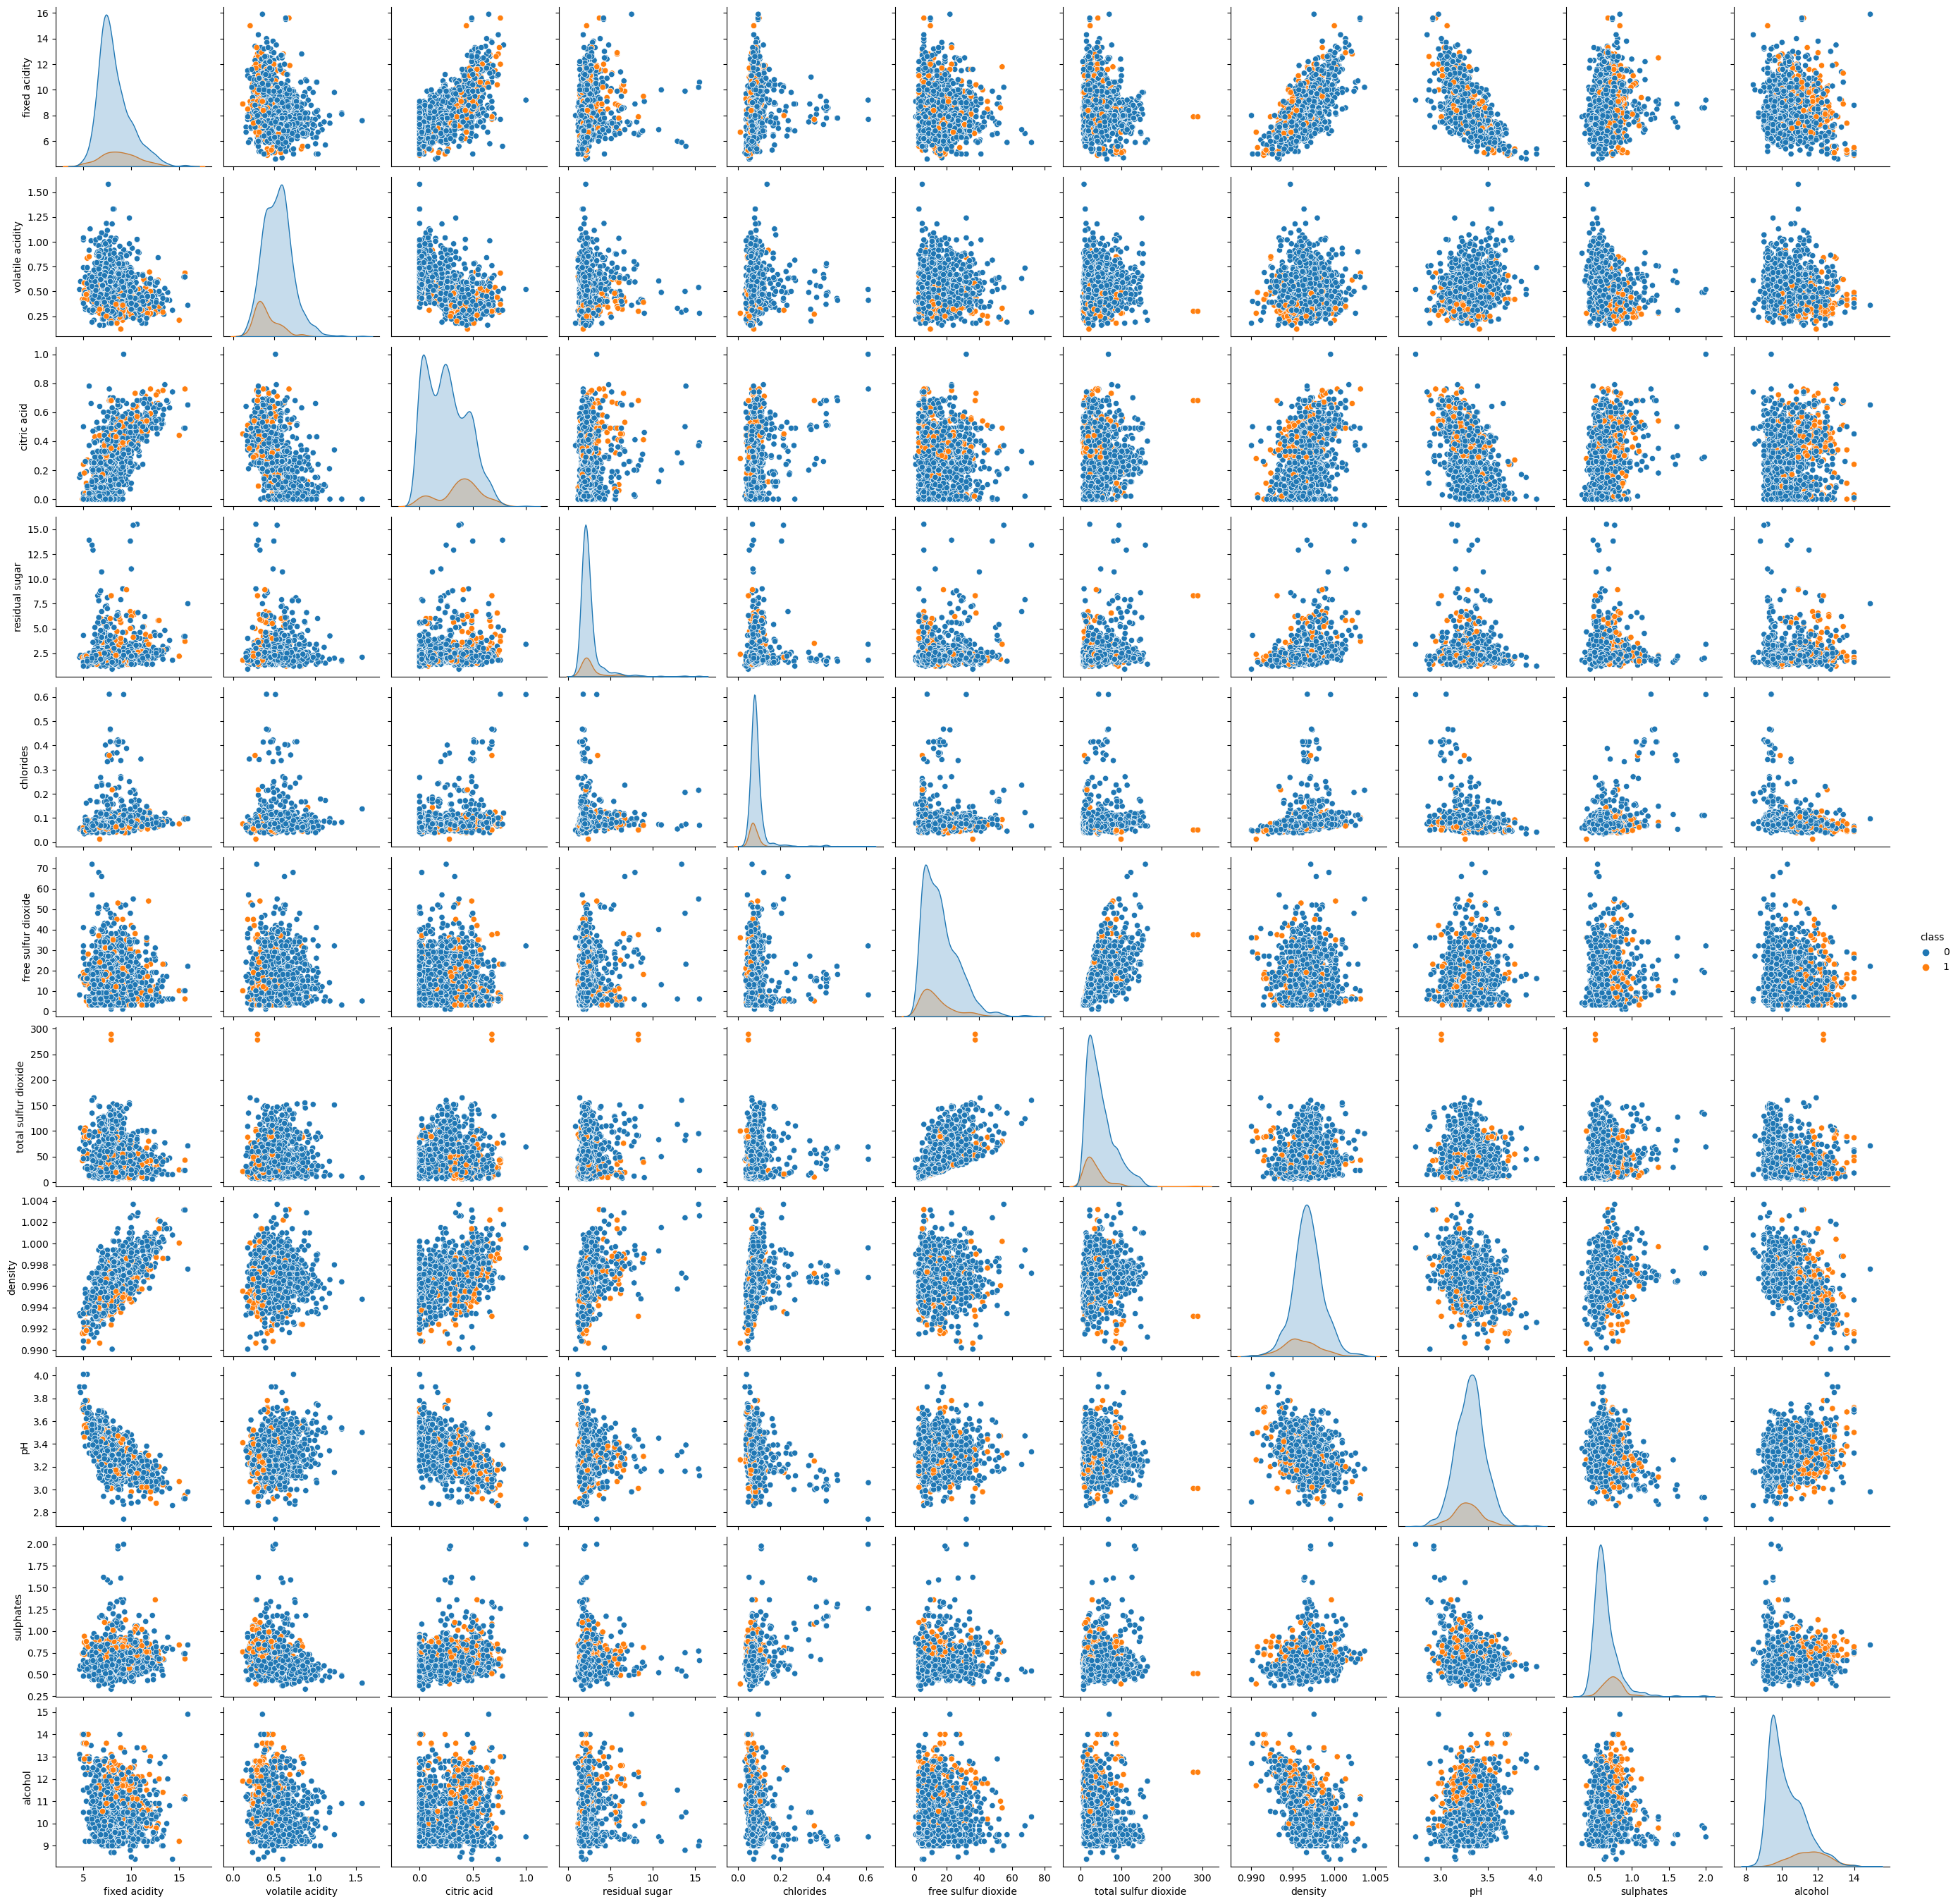

In [32]:
sns.pairplot(data = df1, hue = 'class')
plt.show()

In [33]:
from scipy.stats import zscore
df2 = df1.copy()
z_score = zscore(df2)
z_score_abs = np.abs(z_score)
new_df = df2[(z_score_abs < 3).all(axis = 1)]
new_df.shape

(1458, 12)

In [34]:
print("\033[1m"+ 'percentage Data Loss :' + "\033[0m",((1599 - 1458)/1599)*100,'%')

percentage Data Loss : 8.818011257035648 %


In [35]:
new_df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
class                   2.103030
dtype: float64

In [36]:
from scipy.stats import boxcox

In [37]:
new_df['fixed acidity'] = boxcox(new_df['fixed acidity'], 0)
new_df['residual sugar'] = boxcox(new_df['residual sugar'], -1)
new_df['chlorides'] = boxcox(new_df['chlorides'], -0.5)
new_df['free sulfur dioxide'] = boxcox(new_df['free sulfur dioxide'], 0)
new_df['total sulfur dioxide'] = boxcox(new_df['total sulfur dioxide'], 0)
new_df['sulphates'] = boxcox(new_df['sulphates'], 0)
new_df['alcohol'] = boxcox(new_df['alcohol'], -0.5)

In [38]:
new_df.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.129444
chlorides              -0.174196
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.508422
class                   2.103030
dtype: float64

In [39]:
new_df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.295813     0.692400   
volatile acidity          -0.295813          1.000000    -0.589286   
citric acid                0.692400         -0.589286     1.000000   
residual sugar             0.216829          0.039221     0.187498   
chlorides                  0.241177          0.080724     0.100659   
free sulfur dioxide       -0.170132          0.046278    -0.107676   
total sulfur dioxide      -0.096951          0.099221    -0.027290   
density                    0.664021         -0.000446     0.372338   
pH                        -0.721165          0.252900    -0.521270   
sulphates                  0.190975         -0.356126     0.308570   
alcohol                   -0.037563         -0.212683     0.162704   
class                      0.119643         -0.268236     0.226809   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.216829   0.241177            -0.170132   
volatile acidity            0.039221   0.080724             0.046278   
citric acid                 0.187498   0.100659            -0.107676   
residual sugar              1.000000   0.219573             0.034795   
chlorides                   0.219573   1.000000            -0.012947   
free sulfur dioxide         0.034795  -0.012947             1.000000   
total sulfur dioxide        0.126538   0.095544             0.778888   
density                     0.398875   0.414090            -0.041086   
pH                         -0.073404  -0.206719             0.132344   
sulphates                   0.063047  -0.010645             0.045477   
alcohol                     0.152463  -0.278623            -0.090153   
class                       0.073978  -0.144047            -0.095752   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.096951  0.664021 -0.721165   0.190975   
volatile acidity                  0.099221 -0.000446  0.252900  -0.356126   
citric acid                      -0.027290  0.372338 -0.521270   0.308570   
residual sugar                    0.126538  0.398875 -0.073404   0.063047   
chlorides                         0.095544  0.414090 -0.206719  -0.010645   
free sulfur dioxide               0.778888 -0.041086  0.132344   0.045477   
total sulfur dioxide              1.000000  0.140454  0.032708   0.006369   
density                           0.140454  1.000000 -0.311217   0.133096   
pH                                0.032708 -0.311217  1.000000  -0.025521   
sulphates                         0.006369  0.133096 -0.025521   1.000000   
alcohol                          -0.269103 -0.462380  0.138230   0.255667   
class                            -0.183569 -0.154221 -0.079528   0.312522   

                       alcohol     class  
fixed acidity        -0.037563  0.119643  
volatile acidity     -0.212683 -0.268236  
citric acid           0.162704  0.226809  
residual sugar        0.152463  0.073978  
chlorides            -0.278623 -0.144047  
free sulfur dioxide  -0.090153 -0.095752  
total sulfur dioxide -0.269103 -0.183569  
density              -0.462380 -0.154221  
pH                    0.138230 -0.079528  
sulphates             0.255667  0.312522  
alcohol               1.000000  0.424230  
class                 0.424230  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

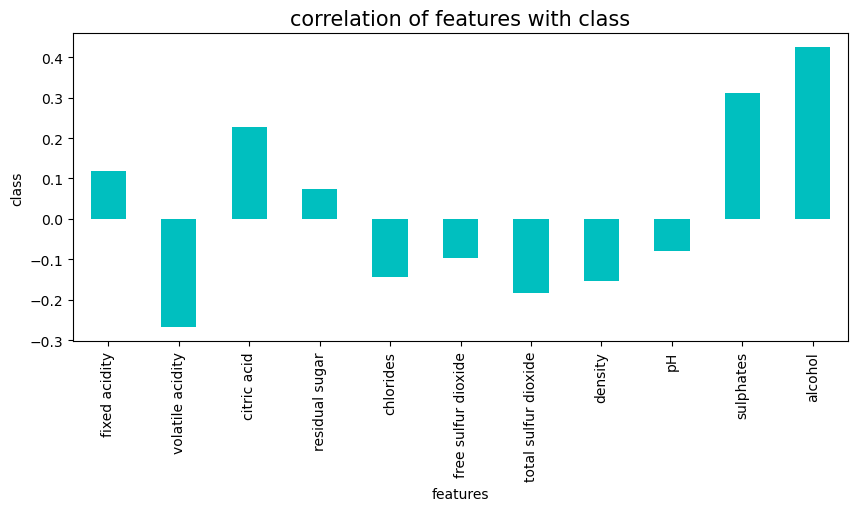

In [40]:
plt.figure(figsize = (10,4))
new_df.corr()['class'].drop(['class']).plot(kind = 'bar', color = 'c')
plt.xlabel('features', fontsize = 10)
plt.ylabel('class', fontsize = 10)
plt.title('correlation of features with class', fontsize = 15)
plt.show

In [41]:
x = new_df.drop(columns = ['class'])
y = new_df['class']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale

array([[-0.51360254,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.60954326, -1.04551382],
       [-0.23702113,  2.10132549, -1.38741253, ..., -0.82375195,
         0.39246697, -0.58517226],
       [-0.23702113,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.15960713, -0.58517226],
       ...,
       [-1.35910388, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.89812923,  0.64182987],
       [-1.70374108,  0.71401945, -0.75981623, ...,  1.80028837,
         0.6152721 , -0.15218234],
       [-1.61543928, -1.26362959,  1.07067297, ...,  0.52372821,
         0.23840028,  0.64182987]])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, random_state = 42, test_size = 0.3)
print('Training feature matrix size:', x_train.shape)
print('Training target vector size:', y_train.shape)
print('Test feature matrix size:', x_test.shape)
print('Test target vector size:', y_test.shape)

Training feature matrix size: (1020, 11)
Training target vector size: (1020,)
Test feature matrix size: (438, 11)
Test target vector size: (438,)


In [45]:
maxaccu = 0
maxrs = 0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(x_scale, y, random_state = i, test_size = 0.3)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    Y_pre = reg.predict(x_test)
    Accu = accuracy_score(y_test, Y_pre)
    if Accu > maxaccu:
        maxaccu = Accu
        masrs = i
print('Accuracy is', maxaccu, 'On Rendom_state', maxrs)   

Accuracy is 0.9246575342465754 On Rendom_state 0


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, random_state = 0, test_size = 0.33)
reg = LogisticRegression()
reg.fit(x_train, y_train)
Y_pre = reg.predict(x_test)
print('\033[1m'+ 'Logistic Regression Evaluation' + '\033[0m')
print('\n')
print('\033[1m'+ 'Accuracy Score Of Logistic Regression :' + '\033[0m', accuracy_score(y_test, Y_pre))
print('\n')
print('\033[1m'+ 'Confusion matrix Of Logistic Regression :' + '\033[0m \n', confusion_matrix(y_test, Y_pre))
print('\n')
print('\033[1m'+ 'Classification Report Of Logistic Regression :' + '\033[0m \n', classification_report(y_test, Y_pre))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression : 0.8900414937759336


Confusion matrix Of Logistic Regression : 
 [[398  16]
 [ 37  31]]


Classification Report Of Logistic Regression : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       414
           1       0.66      0.46      0.54        68

    accuracy                           0.89       482
   macro avg       0.79      0.71      0.74       482
weighted avg       0.88      0.89      0.88       482



In [47]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rms_value = []
for k in range(20):
    k = k+1
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    Y_pre = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, Y_pre))
    rms_value.append(error)
    print('RMS value for K = ', k, 'is:', error)

RMS value for K =  1 is: 0.3783563491881091
RMS value for K =  2 is: 0.33159991891444485
RMS value for K =  3 is: 0.35574712451052976
RMS value for K =  4 is: 0.33779858468831303
RMS value for K =  5 is: 0.3615320099118076
RMS value for K =  6 is: 0.3615320099118076
RMS value for K =  7 is: 0.35865123085553585
RMS value for K =  8 is: 0.3438855353323085
RMS value for K =  9 is: 0.3468889594776243
RMS value for K =  10 is: 0.33779858468831303
RMS value for K =  11 is: 0.3438855353323085
RMS value for K =  12 is: 0.33779858468831303
RMS value for K =  13 is: 0.3438855353323085
RMS value for K =  14 is: 0.3438855353323085
RMS value for K =  15 is: 0.3438855353323085
RMS value for K =  16 is: 0.34986660172721457
RMS value for K =  17 is: 0.35865123085553585
RMS value for K =  18 is: 0.37003980945421655
RMS value for K =  19 is: 0.37003980945421655
RMS value for K =  20 is: 0.35574712451052976


<Axes: >

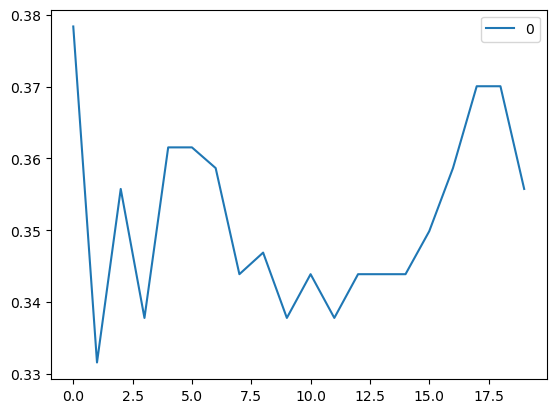

In [49]:
curve = pd.DataFrame(rms_value)
curve.plot()

In [51]:
model = [
          SVC(),
          GaussianNB(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors = 12),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier()]

for m in model:
    m.fit(x_train, y_train)
    Y_pre = m.predict(x_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix', m, 'is' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m \n', accuracy_score(y_test, Y_pre))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(y_test, Y_pre))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(y_test, Y_pre))
    print('\n')
    print('==============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 
 0.8858921161825726


Confusion matrix : 
 [[403  11]
 [ 44  24]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       414
           1       0.69      0.35      0.47        68

    accuracy                           0.89       482
   macro avg       0.79      0.66      0.70       482
weighted avg       0.87      0.89      0.87       482



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score : 
 0.8319502074688797


Confusion matrix : 
 [[357  57]
 [ 24  44]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       414
           1       0.44      0.65      0.52        68

    accuracy                           0.83       482
   macro avg       0.69      0.75      0.71       482
weighted avg       0.87      0.83      0.84       482


In [53]:
from sklearn.model_selection import cross_val_score
model = [
          SVC(),
          GaussianNB(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors = 12),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier()]

for m in model:
    score = cross_val_score(m, x, y, cv = 5)
    print('\n')
    print('\033[1m' + 'Cross Validation Score', m, ':' + '\033[0m\n')
    print('Score :', score)
    print('Mean Score :', score.mean())
    print('Std Deviation :', score.std())
    print('\n')
    print('========================================================================================================')



Cross Validation Score SVC() :

Score : [0.8630137  0.8630137  0.85958904 0.86254296 0.86254296]
Mean Score : 0.8621404698018171
Std Deviation : 0.0012929682756927664




Cross Validation Score GaussianNB() :

Score : [0.89383562 0.75342466 0.8869863  0.74226804 0.87972509]
Mean Score : 0.8312479404980465
Std Deviation : 0.06833432742537314




Cross Validation Score DecisionTreeClassifier() :

Score : [0.86643836 0.80136986 0.85616438 0.74914089 0.81443299]
Mean Score : 0.8175092971802476
Std Deviation : 0.042029637507340144




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.86643836 0.79109589 0.85616438 0.85910653 0.84879725]
Mean Score : 0.844320482041143
Std Deviation : 0.027206632143933835




Cross Validation Score RandomForestClassifier() :

Score : [0.8869863  0.85616438 0.8869863  0.86597938 0.88316151]
Mean Score : 0.875855575954432
Std Deviation : 0.012541491732027786




Cross Validation Score AdaBoostClassifier() :

Score : [0.88013699 0.84246

In [54]:
from sklearn.model_selection import GridSearchCV
para = {'n_estimators':[30, 50, 60], 'max_depth':[10, 20, 40, 60, 80],
         'criterion':['gini', 'entropy'], 'max_features':['auto', 'sqrt', 'log2']}

In [56]:
Cv = GridSearchCV(RandomForestClassifier(), para, cv = 5, n_jobs = -1)
Cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [58]:
Cv.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 50}

In [59]:
Final_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 50, max_depth = 60, max_features = 'sqrt')
Final_model.fit(x_train, y_train)
Y_pre = Final_model.predict(x_test)
print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(y_test, Y_pre))

Accuracy Score :
 0.9232365145228216


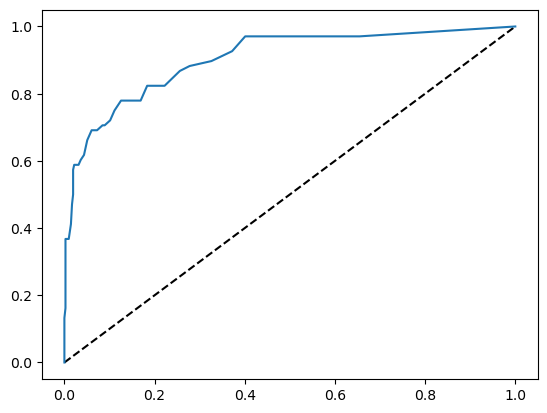

Auc score :
 0.7832480818414324


In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred = Final_model.predict_proba(x_test)[:,1]
fpr, tpr,thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Random Forest Classifier')
plt.xlabel = ('False positive rate')
plt.ylabel = ('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('\033[1m' + 'Auc score :' + '\033[0m\n', auc_score)

In [65]:
import joblib
joblib.dump(Final_model, 'Red_Wine_Quality.pkl')

['Red_Wine_Quality.pkl']